# Logistic regression

The logistic regression is very useful when the outcome (dependant variable) is discrete, or so said categorical random variable. It is usee to describe 2 outcomes. the formula of logistic regression is:  
$$ ln \left( \frac{p}{1-p} \right) = m + kx $$
where $p$ is the probability of winning outcome, or outcome is 1, and $\frac{p}{1-p}$ is odds. $x$ is the independant variable. $m$ and $k$ are coefficients. $ln$ is the logrithmic operation.

The formula can be changed to another form:  
$$ p(y = 1) = \frac{1}{1+e^{-(m+kx)}}$$

It is a sigmoid function (**S-Curve**). With diffrent $x$ value, the probability of outcome being 1 is like the following plot ($p$):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams.update({'figure.figsize': (12,6),\
                     'figure.titlesize':16,\
                     'axes.titlesize':16,\
                     'axes.labelsize':14,\
                     'xtick.labelsize':14,\
                     'ytick.labelsize':14,
                    })

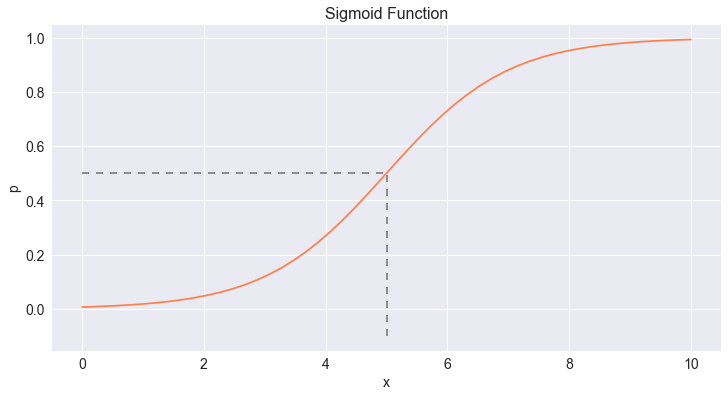

In [2]:
m = -5
k = 1
x = np.linspace(0,10)
p_func = lambda x: 1/(1+np.exp(-(k*x+m)))
fig, ax = plt.subplots()
ax.plot(x,p_func(x),label='logistic', color='coral')
ax.plot([0,abs(m)], [0.5,0.5], dashes=(4,4), color='grey')
ax.plot([abs(m),abs(m)], [-.1,.5], dashes=(4,4), color='grey')
ax.set_title('Sigmoid Function')
ax.set_xlabel('x')
ax.set_ylabel('p')
plt.show()

When $k$ increase to large number, it quickly becomes a sharp change function, which very similar to categorial (2 values)

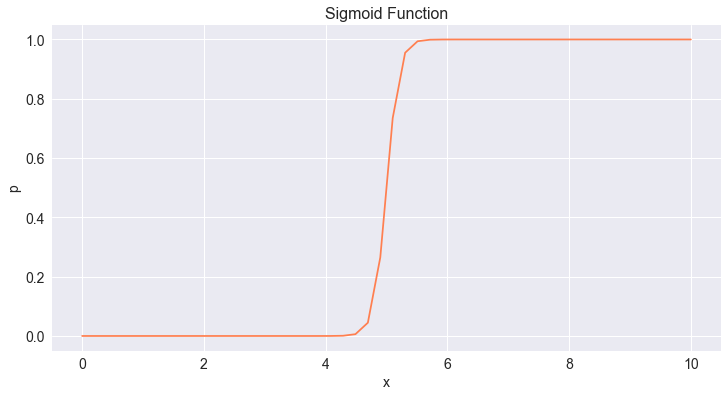

In [3]:
m = -50
k = 10
x = np.linspace(0,10)
p_func = lambda x: 1/(1+np.exp(-(k*x+m)))
fig, ax = plt.subplots()
ax.plot(x,p_func(x),label='logistic', color='coral')
ax.set_title('Sigmoid Function')
ax.set_xlabel('x')
ax.set_ylabel('p')
plt.show()

A multi variate sigmoid function would be:  
  
$$ p(y=1) = \frac{1} {1+e^{-m+\sum\limits_i{k_i x_i}}} $$

## Single Variable Logistic Regression

#### the exam dataset

This dataset is from the book "Mastering Python Data Analysis", by Luiz Felipe Martins.

In [4]:
studytime = [0, 0, 1.5, 2, 2.5, 3, 3.5, 4, 4, 4, 5.5, 6, 6.5, 7, 7, 8.5, 9, 9, 9, 10.5, 10.5, 12, 12, 12, 12.5, 13, 14, 15, 16, 18]
passed =    [0, 0, 0,   0, 0,   0, 0,   0, 0, 0, 0,   1, 0,   1, 1, 0,   1, 1, 0, 1,    1,    1,  1,  1,  1,    1,  1,  1,  1,  1]
data = pd.DataFrame(data=np.array([studytime, passed]).T, columns=['Study Time','Passed'])
data

,Study Time,Passed
0,0.0,0.0
1,0.0,0.0
2,1.5,0.0
3,2.0,0.0
4,2.5,0.0
5,3.0,0.0
6,3.5,0.0
7,4.0,0.0
8,4.0,0.0
9,4.0,0.0


In [5]:
data.dtypes

Study Time    float64
Passed        float64
dtype: object

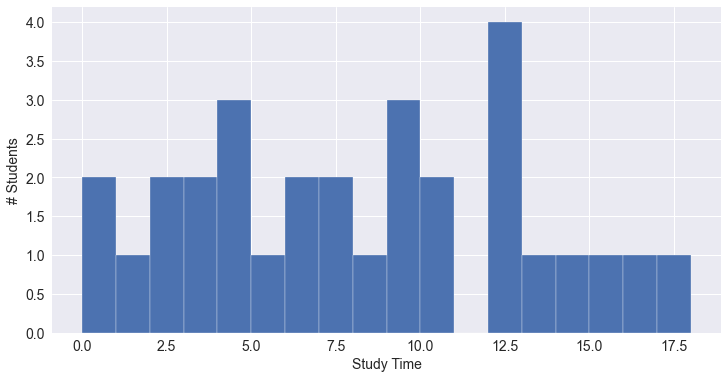

In [6]:
ax = data['Study Time'].hist(bins=18, ec='white')
ax.set_xlabel('Study Time')
ax.set_ylabel('# Students')
plt.show()

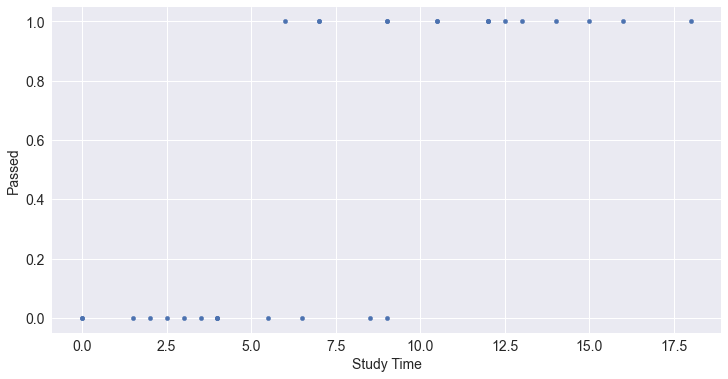

In [7]:
ax = data.plot(x='Study Time', y='Passed', kind='scatter')

We can see that from study time 5 to 10, there are some student passed the exam, some not. but above 10, all students passed. below 5, all student not pass.

#### use scikit-learn

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(data[['Study Time']], data['Passed'])
print(clf.coef_)
print(clf.intercept_)

[[0.74291088]]
[-5.37187834]


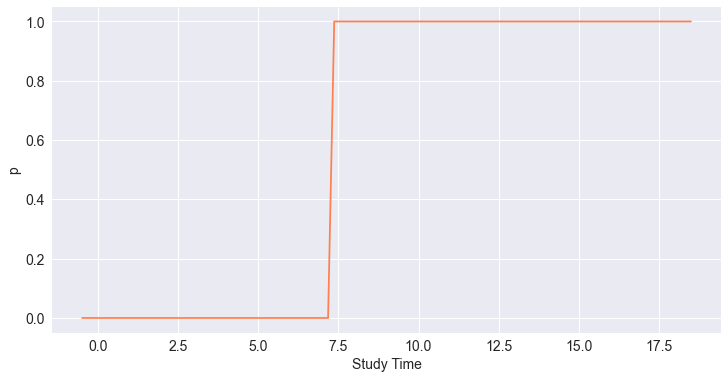

In [9]:
fig, ax = plt.subplots()
test_x = np.linspace(min(studytime)-0.5, max(studytime)+0.5,100)
ax.plot(test_x, clf.predict(test_x.reshape(-1,1)), label='scikit learn', color='coral')
ax.set_xlabel('Study Time')
ax.set_ylabel('p')
plt.show()

Scikit package logistic regression prediction function, will gives a strict classifier result, strictly separated with x around 7.5.

#### Use statsmodels

In [10]:
import statsmodels.api as sm

st_train_x = sm.add_constant(data[['Study Time']])
log_reg = sm.Logit(data['Passed'], st_train_x)
log_result = log_reg.fit()
log_result.summary()

Optimization terminated successfully.
         Current function value: 0.251107
         Iterations 8


C:\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Passed   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Sep 2021   Pseudo R-squ.:                  0.6366
Time:                        09:59:55   Log-Likelihood:                -7.5332
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                 2.791e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7980      2.240     -2.588      0.010     -10.188      -1.408
Study Time     0.8020      0.297      2.703      0.007       0.220       1.384
==============================================================================
"""

The coef for const and x, are different from scikit package.

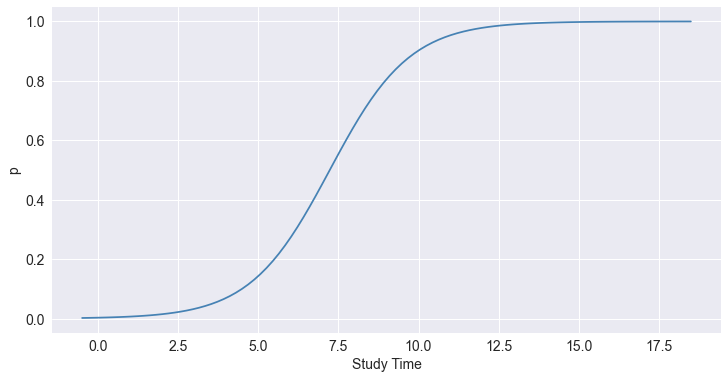

In [11]:
y_predict = log_result.predict(sm.add_constant(test_x.reshape(-1,1)))
fig, ax = plt.subplots()
ax.plot(test_x, y_predict, label='statsmodels', color='steelblue')
ax.set_xlabel('Study Time')
ax.set_ylabel('p')
plt.show()

The prediction is not a sharp change, but is a **smooth S-Curve**. So it is not like a classifier, still a continuous regression result. Between 5 ~ 10 is the transition period also fits for our observation from the train data.  
Scikit-learn package predict result seems give a better classifier result, the results are only 2.

## Multi Variables Logistic Regression

#### the heart disease dataset

Download this dataset from Kaggle website, csv format file is available.  
  
1. Demographic:  
    - Sex: male or female(Nominal)  
    - Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)  
2. Behavioral  
    - Current Smoker: whether or not the patient is a current smoker (Nominal)  
    - Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)  
3. Medical( history)  
    - BP Meds: whether or not the patient was on blood pressure medication (Nominal)  
    - Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)  
    - Prevalent Hyp: whether or not the patient was hypertensive (Nominal)  
    - Diabetes: whether or not the patient had diabetes (Nominal)  
4. Medical(current)  
    - Tot Chol: total cholesterol level (Continuous)  
    - Sys BP: systolic blood pressure (Continuous)  
    - Dia BP: diastolic blood pressure (Continuous)  
    - BMI: Body Mass Index (Continuous)  
    - Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)  
    - Glucose: glucose level (Continuous)  
5. Predict variable (desired target)  
    - 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)  

In [12]:
import pathlib

file_path = pathlib.Path('D:/Edu/data_resource/framingham.csv')
df = pd.read_csv(file_path,header=0)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [13]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [14]:
df=df.drop(["education"], axis = 1)
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [15]:
df.isna().any(axis=1).sum()

489

In [16]:
print(f'{df.isna().any(axis=1).sum() / df.shape[0]:.2%}')

11.54%


there are 489 rows record has NaN value, and 11.54% of the total. We can just drop those reocrds.

In [17]:
df_new = df.dropna()
df_new

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [18]:
features = df_new.iloc[:,:-1]
features

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


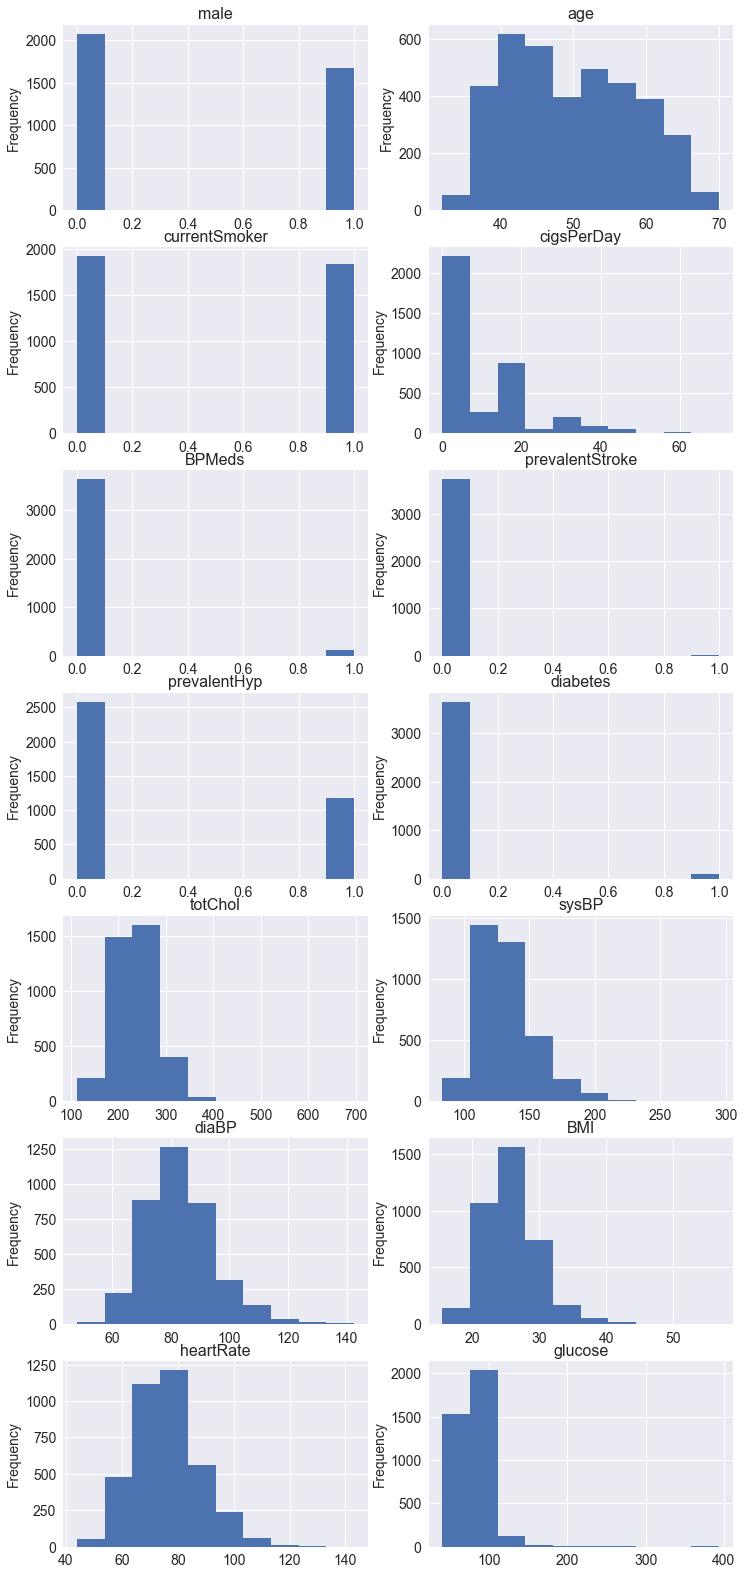

In [19]:
fig, axes= plt.subplots(7,2,figsize=(12,7*4))
flat_axes = [item for sub in axes for item in sub]
iter_ax = iter(flat_axes)
for f_col in features.columns:
    ax=next(iter_ax)
    features[f_col].plot(kind='hist', ax=ax)
    ax.set_title(f_col)
plt.show()

In [20]:
y = df_new.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3749, dtype: int64

In [21]:
clf = LogisticRegression(solver='newton-cg')
clf.fit(features, y)
print(clf.coef_)
print(clf.intercept_)

[[ 0.5674254   0.0640999   0.0710263   0.01848422  0.14415091  0.58079615
   0.2122989   0.00221661  0.00223462  0.01534348 -0.00382703  0.0103664
  -0.00234315  0.00758097]]
[-8.64869189]


In [22]:
clf2 = LogisticRegression(solver='liblinear')
clf2.fit(features, y)
print(clf.coef_)
print(clf.intercept_)

[[ 0.5674254   0.0640999   0.0710263   0.01848422  0.14415091  0.58079615
   0.2122989   0.00221661  0.00223462  0.01534348 -0.00382703  0.0103664
  -0.00234315  0.00758097]]
[-8.64869189]


In [23]:
st_x = sm.add_constant(features)
log_reg = sm.Logit(y, st_x)
log_result = log_reg.fit()
log_result.summary()
# for the warning of Pandas, we can change the data from dataframe and seris to numpy ndarray to solve it. but it did not make difference to the results.

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


C:\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Tue, 28 Sep 2021   Pseudo R-squ.:                  0.1169
Time:                        09:59:57   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
male                0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

for many variables, the cooresponding P-Value is high, thus we should accept the hypothesis that "the related cooefficient is null/zero"  
Those we should keep are:  

- gender
- age
- how many cigs per day
- cholesterol 
- systolic blood pressure
- glucose  

Those we may consider are:  

- prevalent Hypertensive
- prevalent stroke

Thus we can keep only those 8 features to do the regression again.

In [24]:
feature_cols = ['male', 'age', 'cigsPerDay', 'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP', 'glucose']
features2 = df_new[feature_cols]

clf = LogisticRegression(solver='newton-cg')
clf.fit(features2, y)
print(clf.coef_)
print(clf.intercept_)

[[0.56711658 0.06490845 0.02006905 0.61631235 0.21189139 0.00222781
  0.01427033 0.00762089]]
[-8.74987856]


In [25]:
y_predict = clf.predict(features2)
check = y==y_predict
check

0        True
1        True
2        True
3       False
4        True
        ...  
4231     True
4232    False
4233    False
4234     True
4237     True
Name: TenYearCHD, Length: 3749, dtype: bool

In [26]:
check.sum(), check.sum()/check.shape[0]

(3203, 0.8543611629767938)

Out of total 3749 records, the module build only correct for 3203, 85.44% of total

In [27]:
st_x2 = sm.add_constant(features2)
log_reg = sm.Logit(y, st_x2)
log_result = log_reg.fit()
log_result.summary()
# for the warning of Pandas, we can change the data from dataframe and seris to numpy ndarray to solve it. but it did not make difference to the results.

Optimization terminated successfully.
         Current function value: 0.377440
         Iterations 7


C:\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3740
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Sep 2021   Pseudo R-squ.:                  0.1164
Time:                        09:59:58   Log-Likelihood:                -1415.0
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 1.280e-75
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.7497      0.515    -16.986      0.000      -9.759      -7.740
male                0.5732      0.105      5.434      0.000       0.366       0.780
age                 0.0649      0.006     10.222      0.000       0.052       0.077
cigsPerDay          0.0200      0.004      4.877      0.000       0.012       0.028
prevalentStroke     0.7615      0.483      1.575      0.115      -0.186       1.709
prevalentHyp        0.2138      0.133      1.601      0.109      -0.048       0.475
totChol             0.0022      0.001      2.076      0.038       0.000       0.004
sysBP               0.0142      0.003      5.022      0.000       0.009       0.020
glucose             0.0076      0.002      4.603      0.000       0.004       0.011
===================================================================================
"""

As statsmodels prediction is continuous variable not good to do the check here as our target is discrete.

In [28]:
y_predict_sm = log_result.predict(st_x2)
y_predict_sm

0       0.042487
1       0.051892
2       0.146024
3       0.364696
4       0.102520
          ...   
4231    0.238984
4232    0.458785
4233    0.310810
4234    0.227012
4237    0.113098
Length: 3749, dtype: float64